In [13]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
SAVEFIG = True

In [14]:
# get wordfreq quantile
with open("simu4_data/simu4_word_freq.pkl", "rb") as inp:
    df = pickle.load(inp)
df

,item,itemno_old,itemno,freq,quantile
0,ABDOMEN,1,1,110,2
1,ACROBAT,4,2,17,0
2,ADULT,8,3,906,8
3,ALLEY,15,4,165,4
4,ALLIGATOR,16,5,12,0
...,...,...,...,...,...
979,YOKE,1632,980,12,0
980,YOLK,1633,981,47,1
981,YOUTH,1634,982,1159,8
982,ZIPPER,1636,983,24,0


In [15]:
# s_mat = np.load('../Data/simu4_smat_lsa.npy')
s_mat = np.load("simu4_data/simu4_smat.npy")

In [16]:
# freq_order = df.sort_values(by="freq")['itemno'].to_numpy()

# n = len(df)
# smat_order = np.zeros((n,n))
# for i in range(n):
#     for j in range(n):
#         a = s_mat[freq_order[i],freq_order[j]]
#         if not np.isnan(a):
#             smat_order[i,j] = a
#         else:
#             smat_order[i,j] = 0

# smat_order

# plt.subplots(figsize=(20,20))
# sns.heatmap(smat_order,vmax = 0.5, vmin = 0, cmap = 'Reds')
# plt.xlabel('freq order')
# plt.ylabel('freq order')
# plt.title("association matrix of words in freq order")
# # plt.savefig('fig/simu4_smat.pdf')
# plt.show()

# df.groupby("quantile").count()

# np.mean(smat_order[:,0:100])

# np.mean(smat_order[:,-100:-1])

In [17]:
s_mat_dia = s_mat.copy()
np.fill_diagonal(s_mat_dia, 0)
df["s_mean"] = np.sum(s_mat_dia, axis=1) / (np.shape(s_mat_dia)[1] - 1)
df["log_freq"] = np.log(df["freq"])
df

,item,itemno_old,itemno,freq,quantile,s_mean,log_freq
0,ABDOMEN,1,1,110,2,0.120705,4.700480
1,ACROBAT,4,2,17,0,0.077772,2.833213
2,ADULT,8,3,906,8,0.089785,6.809039
3,ALLEY,15,4,165,4,0.115475,5.105946
4,ALLIGATOR,16,5,12,0,0.148066,2.484907
...,...,...,...,...,...,...,...
979,YOKE,1632,980,12,0,0.104189,2.484907
980,YOLK,1633,981,47,1,0.139630,3.850147
981,YOUTH,1634,982,1159,8,0.068675,7.055313
982,ZIPPER,1636,983,24,0,0.131842,3.178054


In [18]:
model = smf.ols(formula="s_mean ~ log_freq", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 s_mean   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     61.16
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           1.35e-14
Time:                        13:12:17   Log-Likelihood:                 2146.9
No. Observations:                 984   AIC:                            -4290.
Df Residuals:                     982   BIC:                            -4280.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1328      0.003     39.789      0.0

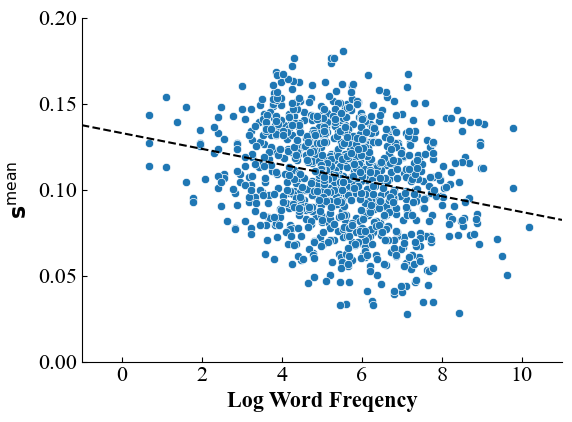

In [26]:
b0 = model.params.iloc[0]
b1 = model.params.iloc[1]

fig, ax = plt.subplots(figsize=(6, 4.5))
sns.scatterplot(data=df, x="log_freq", y="s_mean")
ax.axline((0, b0), slope=b1, color="k", linestyle="--")
ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis="y", direction="in")
ax.tick_params(axis="x", direction="in")

plt.xlim(-1, 11)
plt.ylim(0, 0.2)
plt.ylabel("$\mathbf{s}^{\mathrm{mean}}$")
plt.xlabel("Log Word Freqency", fontweight="bold")
plt.tight_layout()

if SAVEFIG:
    plt.savefig("simu4_fig/simu4_freq_sem.pdf")

In [20]:
model1 = smf.ols(formula="log_freq ~ s_mean", data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               log_freq   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     61.16
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           1.35e-14
Time:                        13:12:17   Log-Likelihood:                -1755.2
No. Observations:                 984   AIC:                             3514.
Df Residuals:                     982   BIC:                             3524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8657      0.182     37.787      0.0

In [21]:
# model-predicted word freq - hard-coded, not updated.

with open("simu4_data/simu4_design.pkl", "rb") as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)

params = cmr.make_default_params()
params.update(
    beta_enc=0.4,
    beta_rec=0.1,
    beta_rec_post=0.2,
    gamma_fc=0.1,
    s_fc=0,
    c_thresh=0.18,
    a=2800,
    b=2.14,
    m=0,
    n=1,
)

df_thin = df_test[["session", "itemno"]]
df_thin = df_thin.assign(s_resp=np.nan, s_rt=np.nan, csim=np.nan)

# extarct the session data
sess = 0
pres_mat = df_study.loc[df_study.session == sess, "itemno"].to_numpy()
pres_mat = np.reshape(pres_mat, (1, len(pres_mat)))
cue_mat = df_thin.loc[df_thin.session == sess, "itemno"].to_numpy()
sem_mat = s_mat

m = cmr.CMR2(params, pres_mat, sem_mat, source_mat=None, rec_mat=None, ffr_mat=None, cue_mat=cue_mat, task="Recog", mode="Final")

In [22]:
df["cal_word_freq"] = m.cal_word_freq
df

,item,itemno_old,itemno,freq,quantile,s_mean,log_freq,cal_word_freq
0,ABDOMEN,1,1,110,2,0.120705,4.700480,202.229553
1,ACROBAT,4,2,17,0,0.077772,2.833213,350.140839
2,ADULT,8,3,906,8,0.089785,6.809039,300.287842
3,ALLEY,15,4,165,4,0.115475,5.105946,216.216629
4,ALLIGATOR,16,5,12,0,0.148066,2.484907,142.533569
...,...,...,...,...,...,...,...,...
979,YOKE,1632,980,12,0,0.104189,2.484907,249.778030
980,YOLK,1633,981,47,1,0.139630,3.850147,158.767059
981,YOUTH,1634,982,1159,8,0.068675,7.055313,393.326263
982,ZIPPER,1636,983,24,0,0.131842,3.178054,175.389938


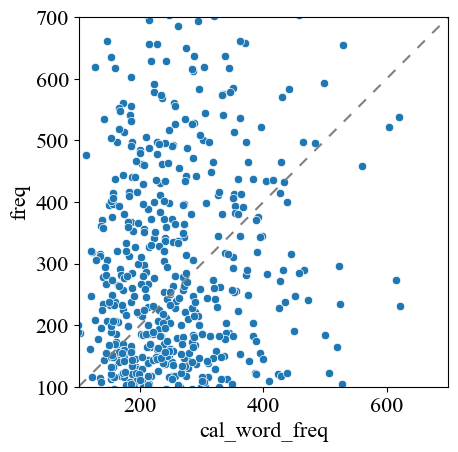

In [23]:
sns.scatterplot(data=df, x="cal_word_freq", y="freq")
plt.axis("square")
plt.ylim([100, 700])
plt.xlim([100, 700])
plt.axline((0, 0), slope=1, color="grey", linestyle=(0, (5, 5)))
# plt.savefig('fig/simu4_predfreq.pdf')
plt.show()